## Fixed-tilt Bifacial Modeling - modelchain, in order to find a way to calculate irradiance over crops between bifacial modules

#### Based on https://pvlib-python.readthedocs.io/en/stable/gallery/bifacial/plot_pvfactors_fixed_tilt.html#sphx-glr-gallery-bifacial-plot-pvfactors-fixed-tilt-py and https://pvlib-python.readthedocs.io/en/stable/gallery/bifacial/plot_bifi_model_mc.html

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import pandas as pd
from pvlib import location
from pvlib.bifacial.pvfactors import pvfactors_timeseries
import matplotlib.pyplot as plt
import warnings

# supressing shapely warnings that occur on import of pvfactors
warnings.filterwarnings(action='ignore', module='pvfactors')

In [23]:
from pvlib import pvsystem
from pvlib import modelchain
from pvlib.temperature import TEMPERATURE_MODEL_PARAMETERS as PARAMS

### Get irradiance

In [35]:
times = pd.date_range('2021-06-21', '2021-06-22', freq='1T', tz='Etc/GMT+5')
loc = location.Location(latitude=40, longitude=-80, tz=times.tz)
sp = loc.get_solarposition(times)
cs = loc.get_clearsky(times)

# example array geometry
pvrow_height = 1
pvrow_width = 4
pitch = 10
gcr = pvrow_width / pitch
axis_azimuth = 180
albedo = 0.2

In [13]:
irrad = pvfactors_timeseries(
    solar_azimuth=sp['azimuth'],
    solar_zenith=sp['apparent_zenith'],
    surface_azimuth=180,  # south-facing array
    surface_tilt=20,
    axis_azimuth=90,  # 90 degrees off from surface_azimuth.  270 is ok too
    timestamps=times,
    dni=cs['dni'],
    dhi=cs['dhi'],
    gcr=gcr,
    pvrow_height=pvrow_height,
    pvrow_width=pvrow_width,
    albedo=albedo,
    n_pvrows=3,
    index_observed_pvrow=1
)

In [14]:
irrad

(2021-06-21 00:00:00-05:00    0.0
 2021-06-21 00:01:00-05:00    0.0
 2021-06-21 00:02:00-05:00    0.0
 2021-06-21 00:03:00-05:00    0.0
 2021-06-21 00:04:00-05:00    0.0
                             ... 
 2021-06-21 23:56:00-05:00    0.0
 2021-06-21 23:57:00-05:00    0.0
 2021-06-21 23:58:00-05:00    0.0
 2021-06-21 23:59:00-05:00    0.0
 2021-06-22 00:00:00-05:00    0.0
 Freq: T, Name: total_inc_front, Length: 1441, dtype: float64,
 2021-06-21 00:00:00-05:00    0.0
 2021-06-21 00:01:00-05:00    0.0
 2021-06-21 00:02:00-05:00    0.0
 2021-06-21 00:03:00-05:00    0.0
 2021-06-21 00:04:00-05:00    0.0
                             ... 
 2021-06-21 23:56:00-05:00    0.0
 2021-06-21 23:57:00-05:00    0.0
 2021-06-21 23:58:00-05:00    0.0
 2021-06-21 23:59:00-05:00    0.0
 2021-06-22 00:00:00-05:00    0.0
 Freq: T, Name: total_inc_back, Length: 1441, dtype: float64,
 2021-06-21 00:00:00-05:00    0.0
 2021-06-21 00:01:00-05:00    0.0
 2021-06-21 00:02:00-05:00    0.0
 2021-06-21 00:03:00-05:0

In [15]:
type(irrad)

tuple

In [16]:
irrad[0]

2021-06-21 00:00:00-05:00    0.0
2021-06-21 00:01:00-05:00    0.0
2021-06-21 00:02:00-05:00    0.0
2021-06-21 00:03:00-05:00    0.0
2021-06-21 00:04:00-05:00    0.0
                            ... 
2021-06-21 23:56:00-05:00    0.0
2021-06-21 23:57:00-05:00    0.0
2021-06-21 23:58:00-05:00    0.0
2021-06-21 23:59:00-05:00    0.0
2021-06-22 00:00:00-05:00    0.0
Freq: T, Name: total_inc_front, Length: 1441, dtype: float64

In [17]:
type(irrad[0])

pandas.core.series.Series

In [18]:
irrad[1]

2021-06-21 00:00:00-05:00    0.0
2021-06-21 00:01:00-05:00    0.0
2021-06-21 00:02:00-05:00    0.0
2021-06-21 00:03:00-05:00    0.0
2021-06-21 00:04:00-05:00    0.0
                            ... 
2021-06-21 23:56:00-05:00    0.0
2021-06-21 23:57:00-05:00    0.0
2021-06-21 23:58:00-05:00    0.0
2021-06-21 23:59:00-05:00    0.0
2021-06-22 00:00:00-05:00    0.0
Freq: T, Name: total_inc_back, Length: 1441, dtype: float64

In [19]:
# turn into pandas DataFrame
irrad_df = pd.concat(irrad, axis=1)

In [20]:
irrad_df

,total_inc_front,total_inc_back,total_abs_front,total_abs_back
2021-06-21 00:00:00-05:00,0.0,0.0,0.0,0.0
2021-06-21 00:01:00-05:00,0.0,0.0,0.0,0.0
2021-06-21 00:02:00-05:00,0.0,0.0,0.0,0.0
2021-06-21 00:03:00-05:00,0.0,0.0,0.0,0.0
2021-06-21 00:04:00-05:00,0.0,0.0,0.0,0.0
...,...,...,...,...
2021-06-21 23:56:00-05:00,0.0,0.0,0.0,0.0
2021-06-21 23:57:00-05:00,0.0,0.0,0.0,0.0
2021-06-21 23:58:00-05:00,0.0,0.0,0.0,0.0
2021-06-21 23:59:00-05:00,0.0,0.0,0.0,0.0


Text(0, 0.5, 'Irradiance [W m$^{-2}$]')

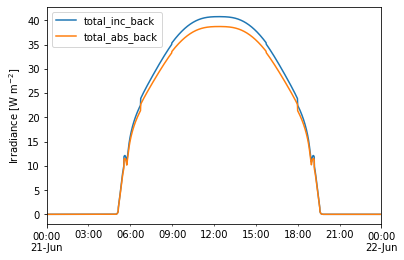

In [22]:
irrad_df[['total_inc_back', 'total_abs_back']].plot()
plt.ylabel('Irradiance [W m$^{-2}$]')

In [36]:
# create bifacial effective irradiance using aoi-corrected timeseries values
irrad_df['effective_irradiance'] = (
    irrad_df['total_abs_front'] + (irrad_df['total_abs_back'] * bifaciality)
)

In [37]:
irrad_df

,total_inc_front,total_inc_back,total_abs_front,total_abs_back,effective_irradiance
2021-06-21 00:00:00-05:00,0.0,0.0,0.0,0.0,0.0
2021-06-21 00:01:00-05:00,0.0,0.0,0.0,0.0,0.0
2021-06-21 00:02:00-05:00,0.0,0.0,0.0,0.0,0.0
2021-06-21 00:03:00-05:00,0.0,0.0,0.0,0.0,0.0
2021-06-21 00:04:00-05:00,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...
2021-06-21 23:56:00-05:00,0.0,0.0,0.0,0.0,0.0
2021-06-21 23:57:00-05:00,0.0,0.0,0.0,0.0,0.0
2021-06-21 23:58:00-05:00,0.0,0.0,0.0,0.0,0.0
2021-06-21 23:59:00-05:00,0.0,0.0,0.0,0.0,0.0


### Get module and inverter related data

In [24]:
bifaciality = 0.75

In [30]:
latitude=40
longitude=-80

In [25]:
# load temperature parameters and module/inverter specifications
temp_model_parameters = PARAMS['sapm']['open_rack_glass_glass']
cec_modules = pvsystem.retrieve_sam('CECMod')
cec_module = cec_modules['Trina_Solar_TSM_300DEG5C_07_II_']
cec_inverters = pvsystem.retrieve_sam('cecinverter')
cec_inverter = cec_inverters['ABB__MICRO_0_25_I_OUTD_US_208__208V_']

In [26]:
temp_model_parameters

{'a': -3.47, 'b': -0.0594, 'deltaT': 3}

In [27]:
cec_module

Technology            Mono-c-Si
Bifacial                      1
STC                     300.217
PTC                       278.9
A_c                        1.65
Length                      NaN
Width                       NaN
N_s                          60
I_sc_ref                   9.68
V_oc_ref                   40.1
I_mp_ref                   9.07
V_mp_ref                   33.1
alpha_sc               0.003775
beta_oc               -0.109874
T_NOCT                     43.4
a_ref                  1.545676
I_L_ref                 9.69201
I_o_ref                     0.0
R_s                    0.251086
R_sh_ref             202.374603
Adjust                13.491088
gamma_r                  -0.384
BIPV                          N
Version       SAM 2018.11.11 r2
Date                   1/3/2019
Name: Trina_Solar_TSM_300DEG5C_07_II_, dtype: object

In [28]:
cec_inverter

Vac                          208
Pso                     2.089607
Paco                       250.0
Pdco                  259.588593
Vdco                        40.0
C0                     -0.000041
C1                     -0.000091
C2                      0.000494
C3                     -0.013171
Pnt                        0.075
Vdcmax                      50.0
Idcmax                  6.489715
Mppt_low                    30.0
Mppt_high                   50.0
CEC_Date                     NaN
CEC_Type     Utility Interactive
Name: ABB__MICRO_0_25_I_OUTD_US_208__208V_, dtype: object

### Get model and perform bifacial simulation

In [39]:
surface_tilt=20
surface_azimuth=180

In [40]:
fixed_mount = pvsystem.FixedMount(surface_tilt, surface_azimuth)

In [41]:
# dc arrays
array = pvsystem.Array(mount=fixed_mount,
                       module_parameters=cec_module,
                       temperature_model_parameters=temp_model_parameters)

In [43]:
# create system object
system = pvsystem.PVSystem(arrays=[array],
                           inverter_parameters=cec_inverter)

In [44]:
# ModelChain requires the parameter aoi_loss to have a value. pvfactors
# applies surface reflection models in the calculation of front and back
# irradiance, so assign aoi_model='no_loss' to avoid double counting
# reflections.
mc_bifi = modelchain.ModelChain(system, site_location, aoi_model='no_loss')

In [45]:
mc_bifi

ModelChain: 
  name: None
  clearsky_model: ineichen
  transposition_model: haydavies
  solar_position_method: nrel_numpy
  airmass_model: kastenyoung1989
  dc_model: cec
  ac_model: sandia_inverter
  aoi_model: no_aoi_loss
  spectral_model: first_solar_spectral_loss
  temperature_model: sapm_temp
  losses_model: no_extra_losses

In [46]:
mc_bifi.run_model_from_effective_irradiance(irrad_df)

/Users/tadatoshi/Documents/development/projects/tadatoshi_solar_research_society/agrivoltaics_supply_side_management/venv/lib/python3.10/site-packages/pvlib/tools.py:340: RuntimeWarning: divide by zero encountered in true_divide
  np.trunc(np.log(atol / (df['VH'] - df['VL'])) / np.log(phim1)))


ModelChain: 
  name: None
  clearsky_model: ineichen
  transposition_model: haydavies
  solar_position_method: nrel_numpy
  airmass_model: kastenyoung1989
  dc_model: cec
  ac_model: sandia_inverter
  aoi_model: no_aoi_loss
  spectral_model: first_solar_spectral_loss
  temperature_model: sapm_temp
  losses_model: no_extra_losses

<AxesSubplot:title={'center':'Bifacial Simulation on June Solstice'}, ylabel='AC Power'>

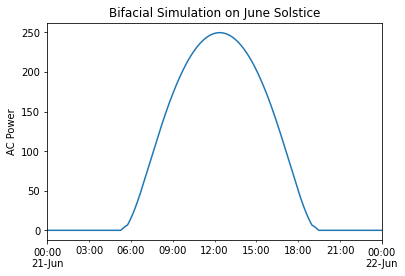

In [47]:
# plot results
mc_bifi.results.ac.plot(title='Bifacial Simulation on June Solstice',
                        ylabel='AC Power')